# 0 - Présentation

## 🌍 Project Overview

This project leverages a Convolutional Variational Autoencoder (CVAE) to reconstruct the climatic signal, focusing on tasmax (daily maximum temperature). The goal is to quantify climate extremes in future climate scenarios.


## 🧠 Objective

We train the model on historical climate data from 1950 to 2000, and test its ability to reconstruct unseen data from 2000 to 2015. After that, we use the trained model to perform inference on future climate projections up to the year 2100.


## 🔍 Methodology

The model is trained to reconstruct seasonal daily maximum temperature signals using historical climate data simulations.

We compute the difference between the model’s prediction and a reference climatic signal, typically from a given SSP (Shared Socioeconomic Pathway) scenario.

Large reconstruction errors indicate that the model struggles to reproduce high-frequency components — these correspond to climate anomalies (extremes).

By analyzing these reconstruction errors, we can detect and quantify extremes (anomalies) in the projected data.

## 📊 Analysis

Once the climate extremes are identified, we can:

- Count their frequency and magnitude

- Track their evolution over time

- Compare different SSP scenarios based on anomaly patterns

## ❄️ Season-Specific Modeling

To capture seasonal dynamics more accurately, we chose to:

- Train a separate CVAE for each season

- Split the dataset accordingly so that each model learns from climate signals corresponding only to one season

This approach allows the models to specialize in the patterns and variabilities unique to each time of year.

# 1 - Import des modules

pip install the https://github.com/interTwin-eu/xtclim version of itwinai.

xtclim is a plugin of itwinai (interTwin project Digital Twin Engine)

In [1]:
#!pip uninstall --yes itwinai-xtclim-plugin
#!pip install --no-cache-dir git+https://github.com/interTwin-eu/xtclim
#!pip install --no-cache-dir git+https://github.com/clemoule/xtclim@notebook_integration
!pip install itwinai

Defaulting to user installation because normal site-packages is not writeable


In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import yaml

# 2 - Configuration

All the relevant parameters are parsed through a config.yaml file. The file is structured as such :

- GENERAL: defines paths and objects of study

- TRAIN: defines training parameters

- MODEL: defines model parameters and the anomaly threshold

- training_pipeline: uses all the aforementioned parameters

If you want to customize the config file, you might want to pay attention to :

- Choose which scenario and which seasons you want to study (seasons, scenarios)

- Choose the historical data you want to to use to train the models (histo_extr)

- Choose the projection data you want to study for each scenario (scenario_extr)

- Choose a zone to study (Geographical region bounding box). Must be 32x32 domain.

- Set the training parameters (TRAIN)

- Set the model parameters (MODEL)

# 3 - Pipeline

In [3]:
%env HYDRA_FULL_ERROR=1
%env NUMEXPR_MAX_THREADS=256

env: HYDRA_FULL_ERROR=1
env: NUMEXPR_MAX_THREADS=256


## 3.1 - Preprocessing

Data normalization, 
xarray conversion

Splits a data set into train and test data (and time)

In [4]:
!itwinai exec-pipeline \
  --config-name=config.yaml \
  +pipe_steps=["preprocessing-step"]

Successfully selected steps ['preprocessing-step']
#######################################
# Starting execution of 'Pipeline'... #
#######################################
#############################################
# Starting execution of 'PreprocessData'... #
#############################################
/home/globc/page/.local/lib/python3.10/site-packages/xarray/conventions.py:200: SerializationWarning: variable 'sftlf' has multiple fill values {1e+20, 1e+20} defined, decoding all values to NaN.
  var = coder.decode(var, name=name)
#########################################
# 'PreprocessData' executed in 135.454s #
#########################################
###################################
# 'Pipeline' executed in 135.454s #
###################################


## 3.2 - Preprocessing-split

Splits and returns the data sets (climate variable and time) per season.

In [5]:
!itwinai exec-pipeline \
  --config-name=config.yaml \
  +pipe_steps=["preprocessing-split-step"]

Successfully selected steps ['preprocessing-split-step']
#######################################
# Starting execution of 'Pipeline'... #
#######################################
####################################################
# Starting execution of 'SplitPreprocessedData'... #
####################################################
##############################################
# 'SplitPreprocessedData' executed in 2.047s #
##############################################
#################################
# 'Pipeline' executed in 2.047s #
#################################


## 3.3 - Training

Fit a model using historical data (1 model per season)

In [6]:
!itwinai exec-pipeline \
  --config-name=config.yaml \
  +pipe_steps=["training-step"]

Successfully selected steps ['training-step']
#######################################
# Starting execution of 'Pipeline'... #
#######################################
###########################################
# Starting execution of 'TorchTrainer'... #
###########################################
Training season: winter
Epoch 1/100
100%|████████████████████████████████████████| 117/117 [00:00<00:00, 913.84it/s]
Figure(1000x700)
Epoch 2/100
100%|████████████████████████████████████████| 117/117 [00:00<00:00, 902.34it/s]
Figure(1000x700)
Epoch 3/100
100%|████████████████████████████████████████| 117/117 [00:00<00:00, 920.87it/s]
Figure(1000x700)
Epoch 4/100
100%|████████████████████████████████████████| 117/117 [00:00<00:00, 920.99it/s]
Epoch 5/100
100%|████████████████████████████████████████| 117/117 [00:00<00:00, 923.27it/s]
Epoch 6/100
100%|████████████████████████████████████████| 117/117 [00:00<00:00, 929.62it/s]
Epoch 7/100
100%|████████████████████████████████████████| 117/117 [0

474it [00:01, 310.53it/s]                                                       
119it [00:00, 924.79it/s]                                                       
Epoch 21/100
474it [00:01, 310.97it/s]                                                       
119it [00:00, 917.61it/s]                                                       
Figure(1000x700)
Epoch 22/100
474it [00:01, 311.25it/s]                                                       
119it [00:00, 927.01it/s]                                                       
Figure(1000x700)
Epoch 23/100
474it [00:01, 311.90it/s]                                                       
119it [00:00, 928.86it/s]                                                       
Epoch 24/100
474it [00:01, 312.10it/s]                                                       
119it [00:00, 928.69it/s]                                                       
Figure(1000x700)
Epoch 25/100
474it [00:01, 310.71it/s]                                                 

120it [00:00, 929.17it/s]                                                       
Epoch 40/100
479it [00:01, 311.65it/s]                                                       
120it [00:00, 912.66it/s]                                                       
Epoch 41/100
479it [00:01, 311.25it/s]                                                       
120it [00:00, 931.30it/s]                                                       
Epoch 42/100
479it [00:01, 311.12it/s]                                                       
120it [00:00, 913.43it/s]                                                       
Epoch 43/100
479it [00:01, 310.94it/s]                                                       
120it [00:00, 931.09it/s]                                                       
Epoch 44/100
479it [00:01, 312.42it/s]                                                       
120it [00:00, 915.20it/s]                                                       
Epoch 45/100
479it [00:01, 310.79it/s]      

479it [00:01, 311.98it/s]                                                       
120it [00:00, 922.88it/s]                                                       
Epoch 50/100
479it [00:01, 310.05it/s]                                                       
120it [00:00, 925.13it/s]                                                       
Epoch 51/100
479it [00:01, 310.54it/s]                                                       
120it [00:00, 916.95it/s]                                                       
Epoch 52/100
479it [00:01, 310.31it/s]                                                       
120it [00:00, 917.92it/s]                                                       
Epoch 53/100
479it [00:01, 309.80it/s]                                                       
120it [00:00, 922.91it/s]                                                       
Epoch 54/100
479it [00:01, 309.99it/s]                                                       
120it [00:00, 919.44it/s]                   

## 3.4 - Inference

Predict the behaviour of each scenario or predict the behaviour of the train and test set

### 3.4.1 - Train and test inference

In [7]:
!itwinai exec-pipeline \
  --config-name=config.yaml \
  GENERAL.on_train_test=True \
  +pipe_steps=["inference-step"]

Successfully selected steps ['inference-step']
#######################################
# Starting execution of 'Pipeline'... #
#######################################
#############################################
# Starting execution of 'TorchInference'... #
#############################################
Running inference for season: winter
100%|██████████████████████████████████████| 1170/1170 [00:01<00:00, 982.50it/s]
Saved inference results for winter
Running inference for season: spring
100%|█████████████████████████████████████| 1183/1183 [00:01<00:00, 1092.67it/s]
Saved inference results for spring
Running inference for season: summer
100%|██████████████████████████████████████| 1196/1196 [00:01<00:00, 979.32it/s]
Saved inference results for summer
Running inference for season: autumn
100%|██████████████████████████████████████| 1196/1196 [00:01<00:00, 979.91it/s]
Saved inference results for autumn
########################################
# 'TorchInference' executed in 25.856s #
#

### 3.4.1 - Projection inference

In [ ]:
!itwinai exec-pipeline \
  --config-name=config.yaml \
  GENERAL.on_train_test=False \
  +pipe_steps=["inference-step"]

Successfully selected steps ['inference-step']
#######################################
# Starting execution of 'Pipeline'... #
#######################################
#############################################
# Starting execution of 'TorchInference'... #
#############################################
Running inference for season: winter
100%|█████████████████████████████████████| 7740/7740 [00:07<00:00, 1014.92it/s]
Figure(1000x700)
val_loss =  0.0013826242670898813
100%|█████████████████████████████████████| 7740/7740 [00:07<00:00, 1096.87it/s]
Figure(1000x700)
val_loss =  0.0012014017684884683
Saved inference results for winter
Running inference for season: spring
100%|█████████████████████████████████████| 7826/7826 [00:07<00:00, 1092.97it/s]
Figure(1000x700)
val_loss =  0.0024987205146463102
100%|█████████████████████████████████████| 7826/7826 [00:07<00:00, 1067.04it/s]
Figure(1000x700)
val_loss =  0.0021404300735691256
Saved inference results for spring
Running inference for s

# 4 - Results analysis

In [3]:
# set up some variables
with open("config.yaml", "r") as file:
    config = yaml.safe_load(file)

scenarios = config["GENERAL"]["scenarios"]
columns = ["train", "test"] + [f"ssp{ssp}" for ssp in scenarios]
seasons = config["GENERAL"]["seasons"]
season_sizes = {"winter": 90, "spring": 91, "summer": 92, "autumn": 92, "": 365}
total_days_per_year = season_sizes[""]
anomaly_percent = config["MODEL"]["anomaly_percent"]

In [4]:
# Lecture des fichiers
for season in seasons:
    # train time per day (for each season)
    globals()[f"train_time_{season}"] = pd.read_csv(f"./inputs/dates_train_{season}_data_1memb.csv")
    # test time per day (for each season)
    globals()[f"test_time_{season}"] = pd.read_csv(f"./inputs/dates_test_{season}_data_1memb.csv")
    # proj time per day (for each season)
    globals()[f"proj_time_{season}"] = pd.read_csv(f"./inputs/dates_proj_{season}_data_1memb.csv")
    # train loss per epoch (for each season)
    globals()[f"train_loss_per_epoch_{season}"] = pd.read_csv(f"./outputs/train_loss_per_epoch_indiv_{season}_1d_1memb.csv")
    # test loss per epoch (for each season)
    globals()[f"test_loss_per_epoch_{season}"] = pd.read_csv(f"./outputs/test_loss_per_epoch_indiv_{season}_1d_1memb.csv")
    # train loss per day (for each season)
    globals()[f"train_loss_{season}"] = pd.read_csv(f"./outputs/train_loss_indiv_{season}_1d_1memb.csv")
    # test loss per day (for each season)
    globals()[f"test_loss_{season}"] = pd.read_csv(f"./outputs/test_loss_indiv_{season}_1d_1memb.csv")
    print(f"train_time_{season}")
    print(f"test_time_{season}")
    print(f"proj_time_{season}")
    print(f"train_loss_{season}")
    print(f"test_loss_{season}")
    print(f"train_loss_per_epoch_{season}")
    print(f"test_loss_per_epoch_{season}")
    for scenario in scenarios:
        # proj loss per day (for each season)
        globals()[f"proj_loss_{season}_{scenario}"] = pd.read_csv(f"./outputs/proj{scenario}_loss_indiv_{season}_1d_1memb.csv")
        print(f"proj_loss_{season}_{scenario}")

train_time_winter
test_time_winter
proj_time_winter
train_loss_winter
test_loss_winter
train_loss_per_epoch_winter
test_loss_per_epoch_winter
proj_loss_winter_585
proj_loss_winter_245
train_time_spring
test_time_spring
proj_time_spring
train_loss_spring
test_loss_spring
train_loss_per_epoch_spring
test_loss_per_epoch_spring
proj_loss_spring_585
proj_loss_spring_245
train_time_summer
test_time_summer
proj_time_summer
train_loss_summer
test_loss_summer
train_loss_per_epoch_summer
test_loss_per_epoch_summer
proj_loss_summer_585
proj_loss_summer_245
train_time_autumn
test_time_autumn
proj_time_autumn
train_loss_autumn
test_loss_autumn
train_loss_per_epoch_autumn
test_loss_per_epoch_autumn
proj_loss_autumn_585
proj_loss_autumn_245


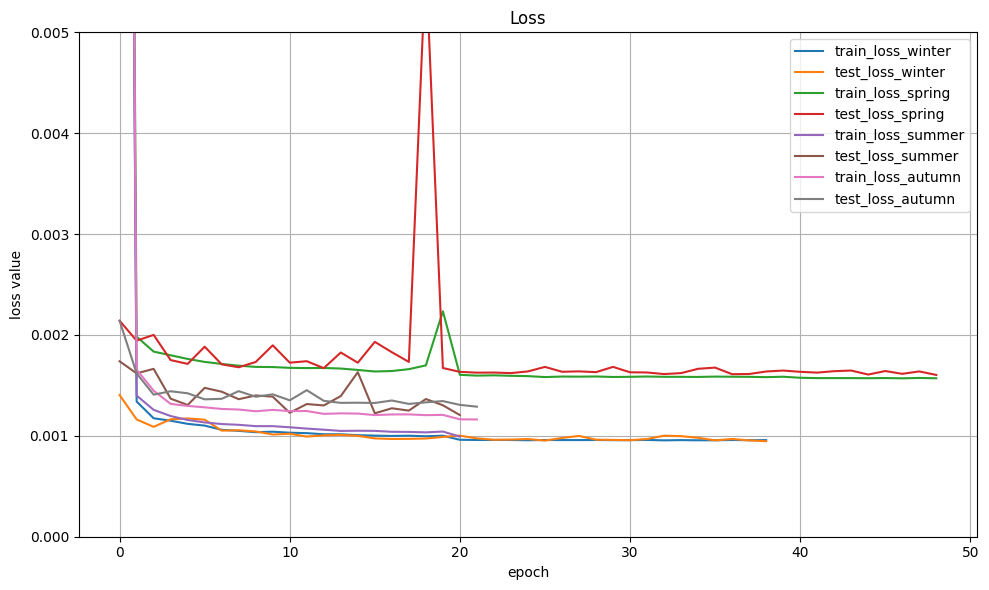

In [5]:
def display_fit():
    plt.figure(figsize=(10, 6))  # Optionnel, pour une meilleure taille de figure

    for season in seasons:
        train_loss = globals()[f"train_loss_per_epoch_{season}"]
        test_loss = globals()[f"test_loss_per_epoch_{season}"]

        sns.lineplot(x=train_loss.index, y=train_loss.iloc[:, 0], label=f"train_loss_{season}")
        sns.lineplot(x=test_loss.index, y=test_loss.iloc[:, 0], label=f"test_loss_{season}")

    plt.title("Loss")
    plt.xlabel("epoch")
    plt.ylabel("loss value")
    plt.ylim(0, 0.005)
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()


display_fit()

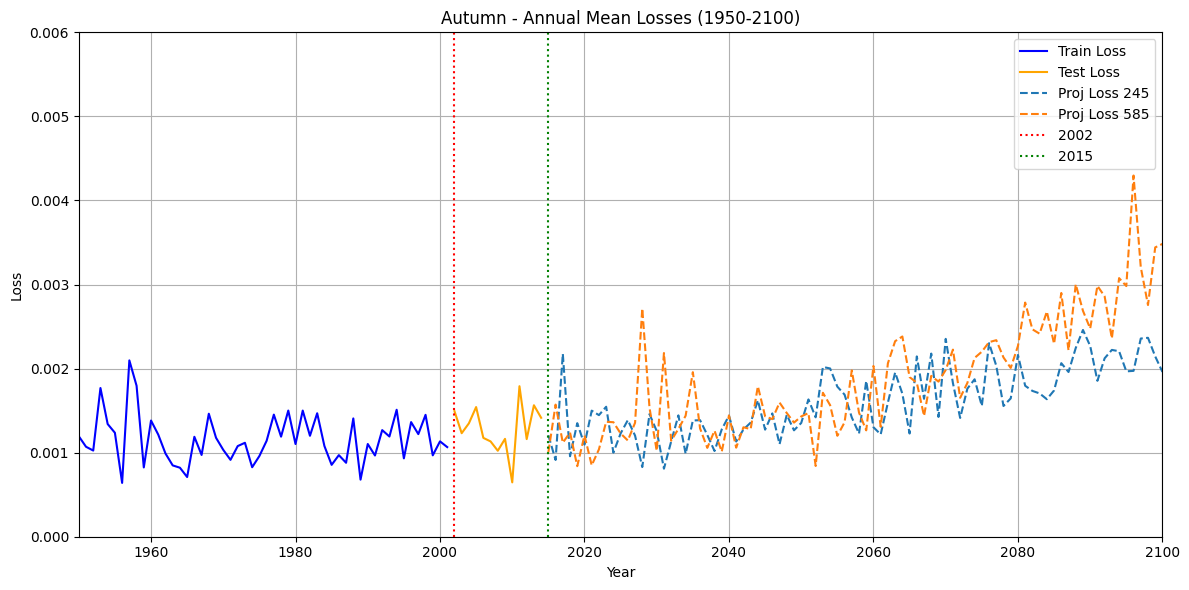

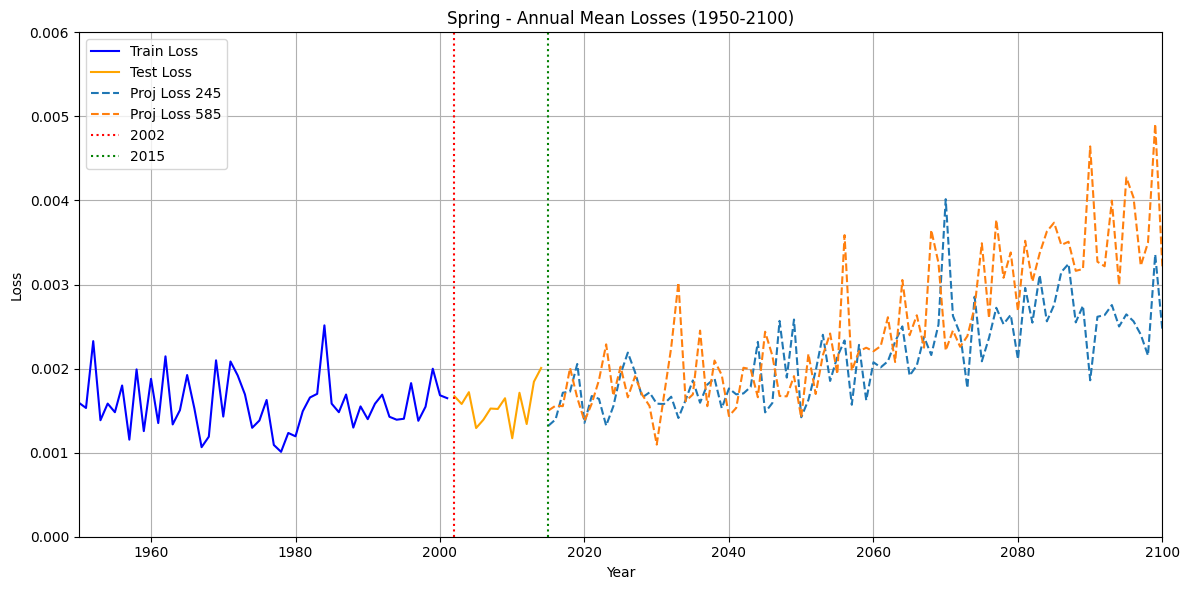

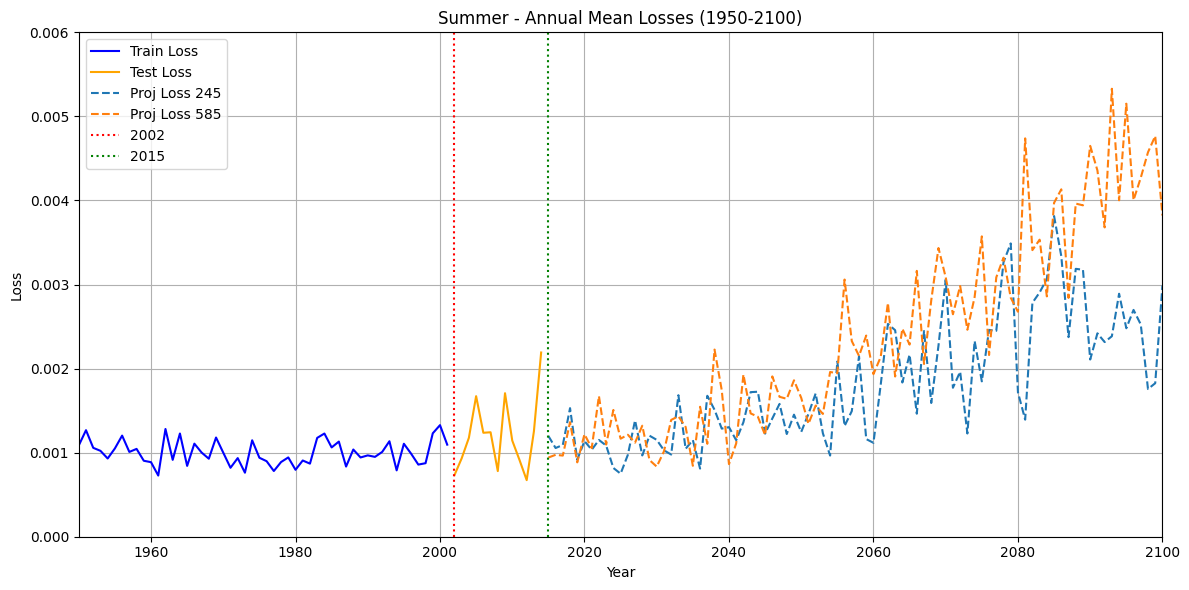

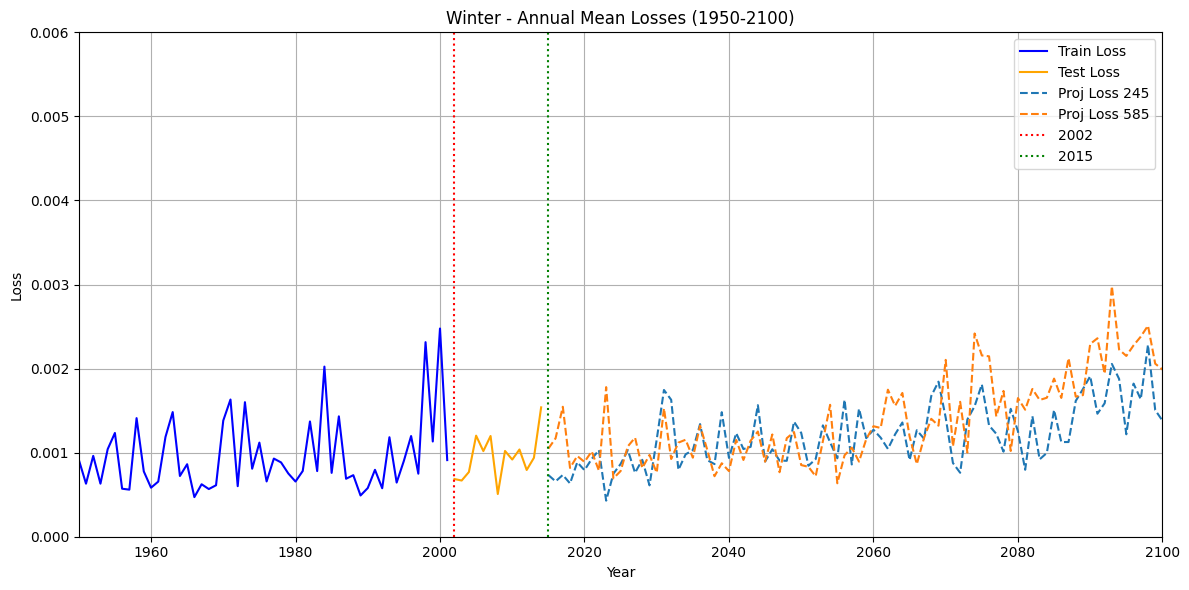

In [7]:
import pandas as pd


def plot_losses(season: str, average: str = "year", percentile: int = 99):
    """
    Trace train, test, and projection losses for a given season on a single plot,
    with vertical lines at 2002 and 2014.

    Parameters:
    - season: 'winter', 'spring', 'summer', or 'autumn'.
    - average: 'year' or 'season', to plot yearly or seasonal means.
    """
    # Load data dynamically from CSV files
    train_time = pd.read_csv(f"./inputs/dates_train_{season}_data_1memb.csv")
    train_loss = pd.read_csv(f"./outputs/train_loss_indiv_{season}_1d_1memb.csv")
    test_time = pd.read_csv(f"./inputs/dates_test_{season}_data_1memb.csv")
    test_loss = pd.read_csv(f"./outputs/test_loss_indiv_{season}_1d_1memb.csv")
    proj_time = pd.read_csv(f"./inputs/dates_proj_{season}_data_1memb.csv")
    proj_losses = {
        "245": pd.read_csv(f"./outputs/proj245_loss_indiv_{season}_1d_1memb.csv"),
        "585": pd.read_csv(f"./outputs/proj585_loss_indiv_{season}_1d_1memb.csv"),
    }

    # Helper: build a series
    def make_series(time_df, loss_df):
        ts = pd.to_datetime(time_df.iloc[:, 1])
        ls = loss_df.iloc[:, 1].astype(float)
        return pd.Series(data=ls.values, index=ts, name="loss")

    s_train = make_series(train_time, train_loss)
    s_test = make_series(test_time, test_loss)
    s_proj = {label: make_series(proj_time, df) for label, df in proj_losses.items()}

    # Optionally group
    def group_series(s: pd.Series):
        if average == "year":
            return s.resample("YE").mean().rename(s.name)
        elif average == "season":
            # Define meteorological seasons
            seasons = (s.index.month % 12 + 3) // 3
            df = pd.DataFrame({"loss": s.values, "year": s.index.year, "season": seasons})
            df.loc[(df["season"] == 1) & (s.index.month == 12), "year"] += 1
            grouped = df.groupby(["year", "season"])["loss"].mean()
            season_month_day = {1: "-02-15", 2: "-05-15", 3: "-08-15", 4: "-11-15"}
            season_month_day = {1: "-01-01", 2: "-04-01", 3: "-07-01", 4: "-10-01"}  # test
            dates = grouped.index.to_frame()
            dates["date"] = pd.to_datetime(dates["year"].astype(str) + dates["season"].map(season_month_day))
            grouped.index = dates["date"]
            return grouped.rename(s.name)
        else:
            raise ValueError("average must be 'year' or 'season'")

    # Group if needed
    if average in ["year", "season"]:
        s_train_g = group_series(s_train)
        s_test_g = group_series(s_test)
        s_proj_g = {label: group_series(s) for label, s in s_proj.items()}
    else:
        s_train_g, s_test_g, s_proj_g = s_train, s_test, s_proj

    # Plotting
    plt.figure(figsize=(12, 6))
    plt.plot(s_train_g.index.year if average == "year" else s_train_g.index, s_train_g.values, label="Train Loss", color="blue")
    plt.plot(s_test_g.index.year if average == "year" else s_test_g.index, s_test_g.values, label="Test Loss", color="orange")
    for label, series in s_proj_g.items():
        plt.plot(
            series.index.year if average == "year" else series.index, series.values, label=f"Proj Loss {label}", linestyle="--"
        )

    plt.axvline(x=2002, color="red", linestyle=":", label="2002")
    plt.axvline(x=2015, color="green", linestyle=":", label="2015")
    plt.xlim(1950, 2100)
    plt.ylim(0, 0.006)
    plt.xlabel("Year")
    plt.ylabel("Loss")
    plt.title(f"{season.capitalize()} - {'Annual' if average == 'year' else 'Seasonal'} Mean Losses (1950-2100)")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.savefig(f"./figs/{season}_mean_losses.png")  # ou .jpg, .pdf, etc.
    plt.show()


# Exemple d'appel :
plot_losses("autumn", average="year")
plot_losses("spring", average="year")
plot_losses("summer", average="year")
plot_losses("winter", average="year")

In [8]:
def detect_anomalies_on_window(values, threshold, window_size):
    """
    Pour chaque intervalle de `window_size` jours consécutifs,
    retourne le nombre d'anomalies (valeurs > seuil) et l'intervalle.

    Args:
        values (np.array or list): série de valeurs (ex: pertes projetées)
        threshold (float): valeur seuil à dépasser pour qu'une valeur soit une anomalie
        window_size (int): nombre de jours consécutifs à analyser

    Returns:
        List[Tuple[int, int, int]]: liste de (jour_debut, jour_fin, nb_anomalies)
    """
    results = []
    for i in range(len(values) - window_size + 1):
        window = values[i : i + window_size]
        anomaly_count = (window > threshold).sum()
        results.append((i, i + window_size - 1, anomaly_count))
    return results


Top 5 windows with most anomalies (over 30 days):
From day 7079 to 7108: 19 anomalies
From day 7080 to 7109: 19 anomalies
From day 7081 to 7110: 19 anomalies
From day 7082 to 7111: 19 anomalies
From day 7083 to 7112: 19 anomalies
winter - Scenario ssp585: 144 days above threshold 0.0049


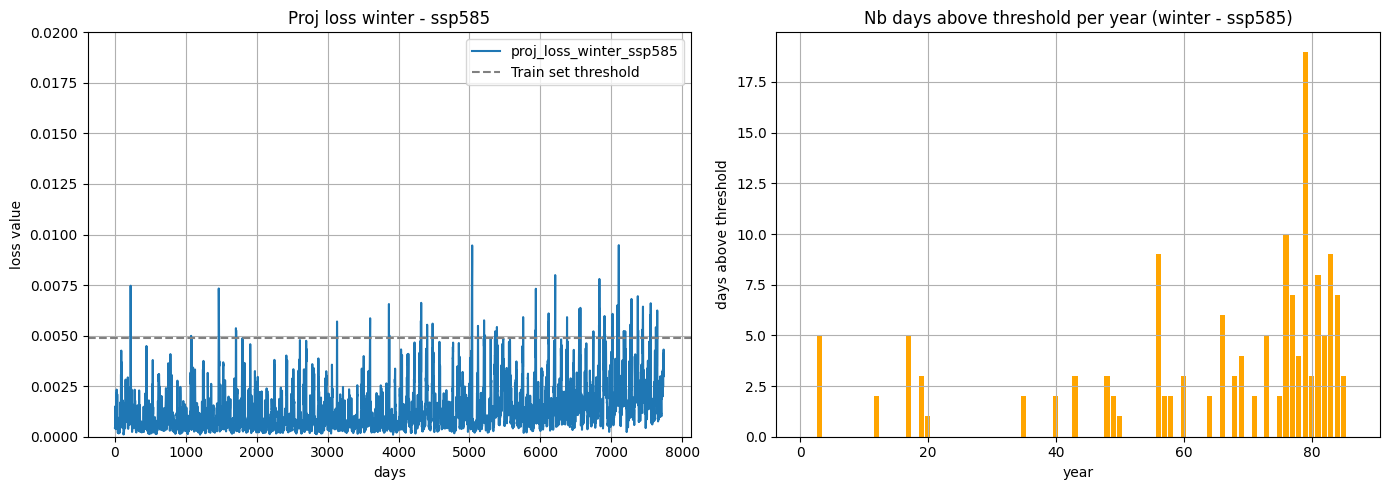


Top 5 windows with most anomalies (over 30 days):
From day 6808 to 6837: 10 anomalies
From day 6809 to 6838: 10 anomalies
From day 6810 to 6839: 10 anomalies
From day 6811 to 6840: 10 anomalies
From day 6812 to 6841: 10 anomalies
winter - Scenario ssp245: 110 days above threshold 0.0049


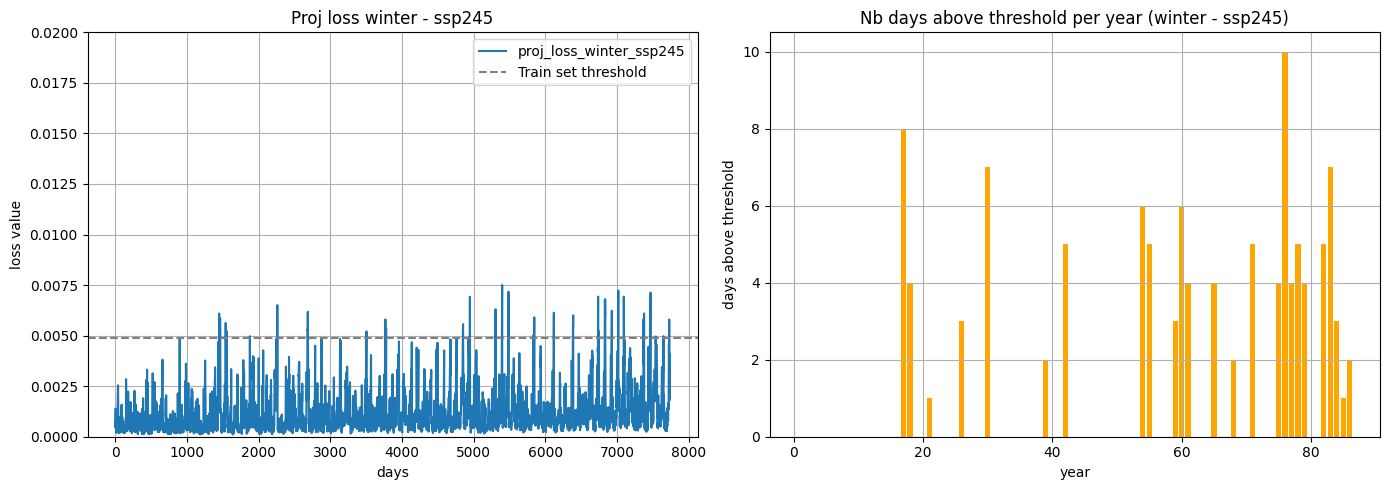


Top 5 windows with most anomalies (over 30 days):
From day 7704 to 7733: 30 anomalies
From day 7705 to 7734: 30 anomalies
From day 7703 to 7732: 29 anomalies
From day 7706 to 7735: 29 anomalies
From day 7335 to 7364: 28 anomalies
spring - Scenario ssp585: 828 days above threshold 0.0056


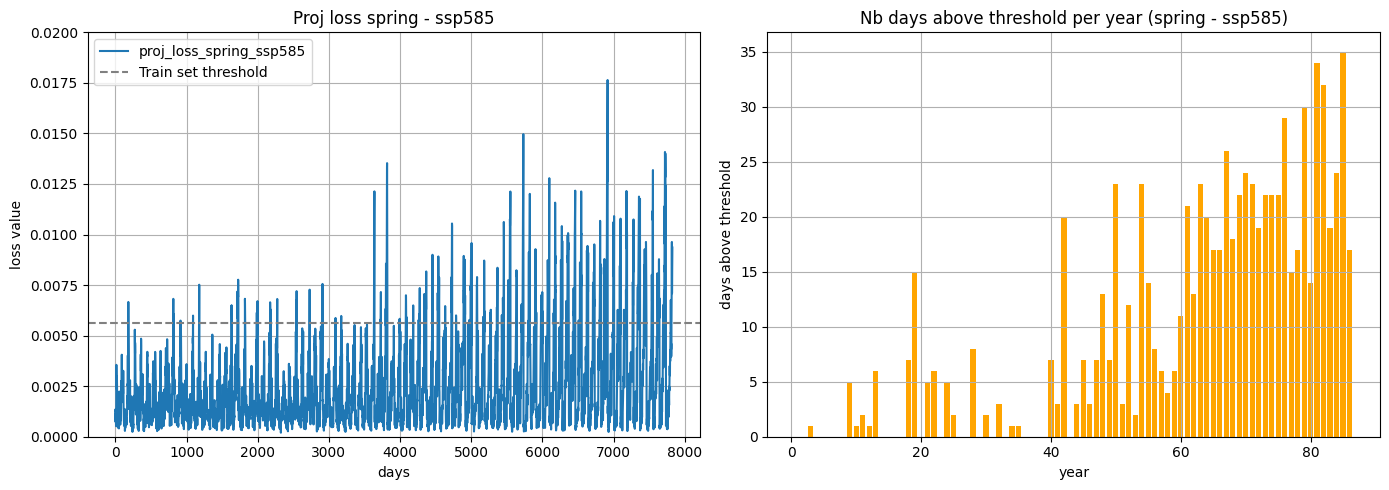


Top 5 windows with most anomalies (over 30 days):
From day 5065 to 5094: 24 anomalies
From day 5066 to 5095: 24 anomalies
From day 5067 to 5096: 24 anomalies
From day 5068 to 5097: 24 anomalies
From day 5069 to 5098: 24 anomalies
spring - Scenario ssp245: 508 days above threshold 0.0056


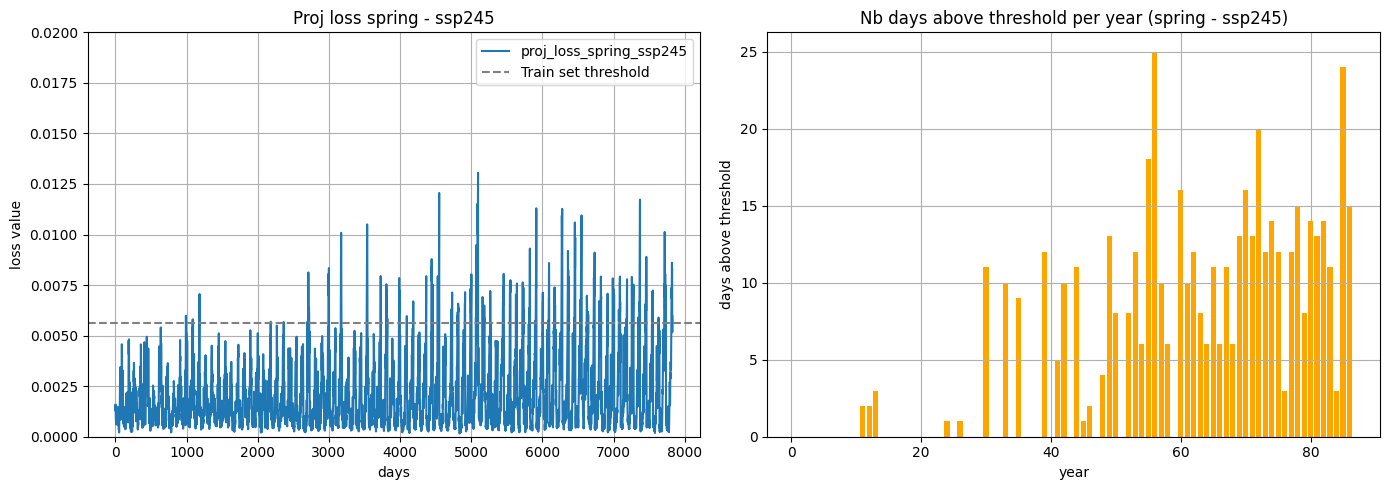


Top 5 windows with most anomalies (over 30 days):
From day 5073 to 5102: 30 anomalies
From day 5074 to 5103: 30 anomalies
From day 5075 to 5104: 30 anomalies
From day 5076 to 5105: 30 anomalies
From day 5077 to 5106: 30 anomalies
summer - Scenario ssp585: 1710 days above threshold 0.0037


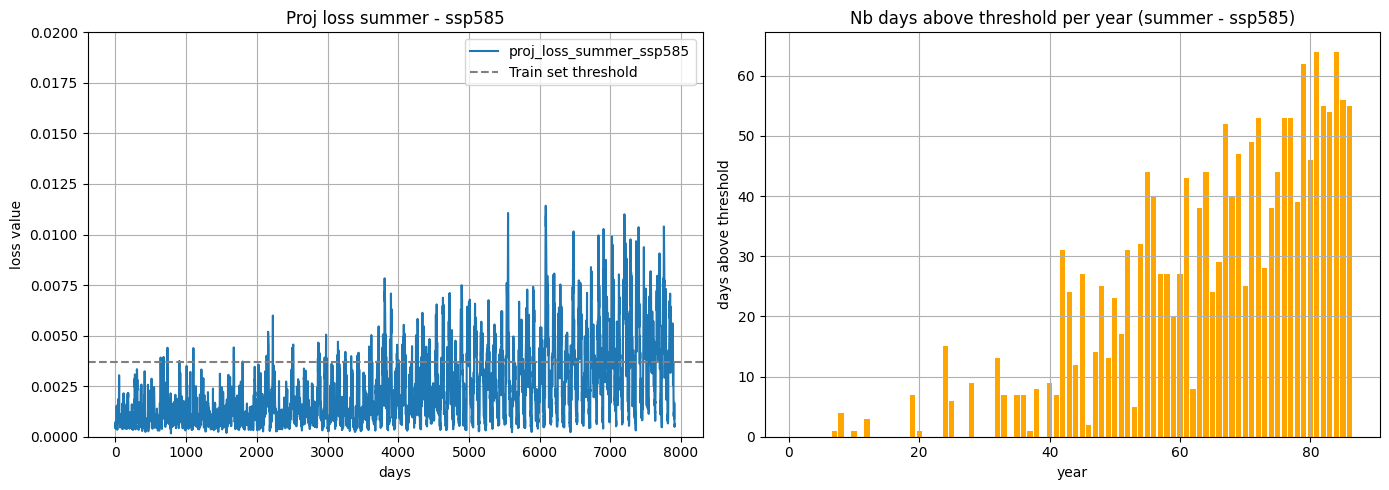


Top 5 windows with most anomalies (over 30 days):
From day 6465 to 6494: 30 anomalies
From day 6466 to 6495: 30 anomalies
From day 6544 to 6573: 30 anomalies
From day 6545 to 6574: 30 anomalies
From day 6546 to 6575: 30 anomalies
summer - Scenario ssp245: 824 days above threshold 0.0037


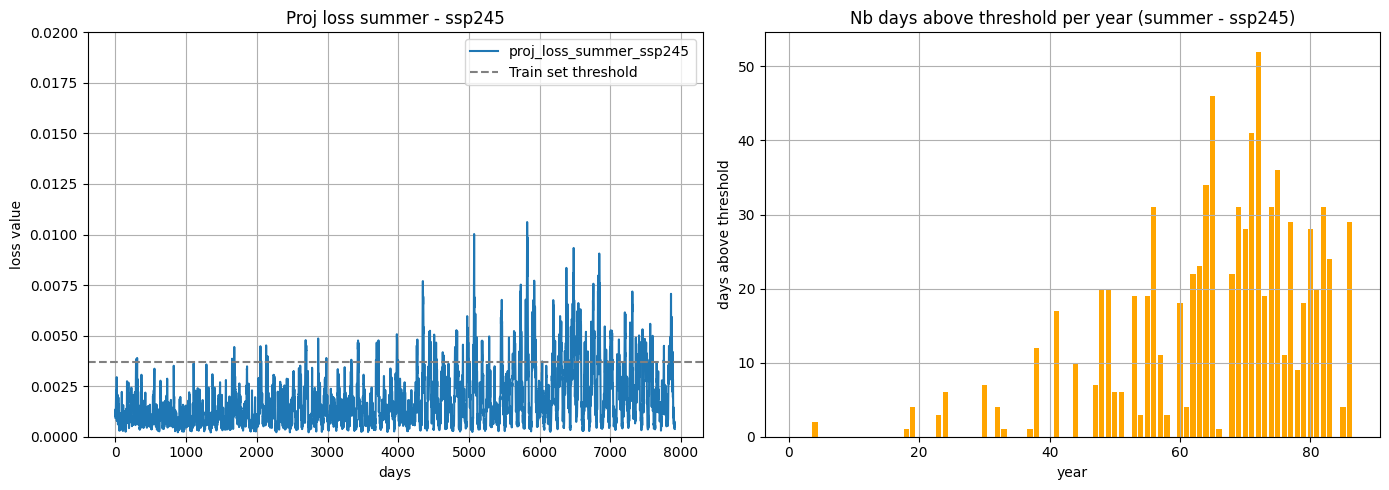


Top 5 windows with most anomalies (over 30 days):
From day 6714 to 6743: 28 anomalies
From day 6715 to 6744: 28 anomalies
From day 6716 to 6745: 28 anomalies
From day 7266 to 7295: 28 anomalies
From day 7267 to 7296: 28 anomalies
autumn - Scenario ssp585: 813 days above threshold 0.0048


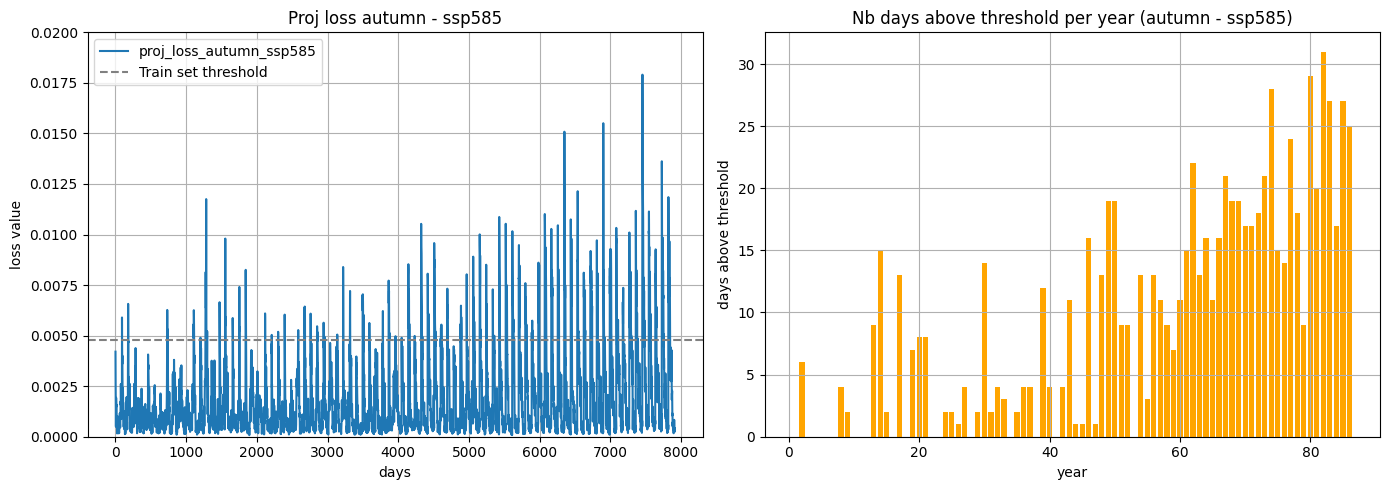


Top 5 windows with most anomalies (over 30 days):
From day 7535 to 7564: 20 anomalies
From day 7536 to 7565: 20 anomalies
From day 7537 to 7566: 20 anomalies
From day 7538 to 7567: 20 anomalies
From day 7539 to 7568: 20 anomalies
autumn - Scenario ssp245: 530 days above threshold 0.0048


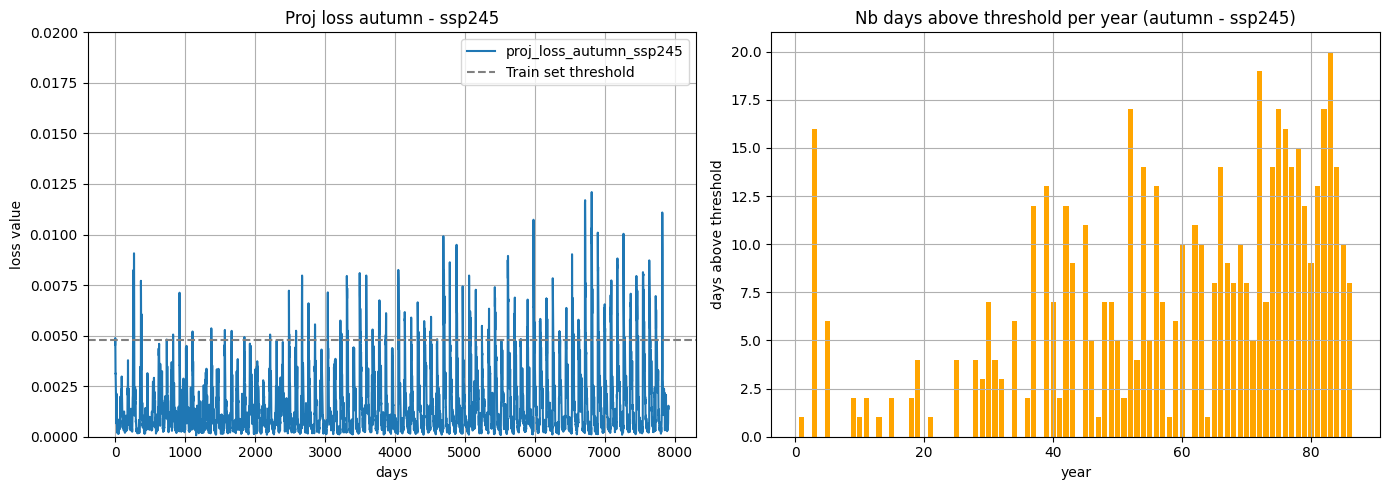

In [9]:
def display_proj_loss(percentile=99):
    for season in seasons:
        threshold = globals()[f"train_loss_{season}"]["0"].quantile(percentile / 100)
        season_size = season_sizes.get(season, 365)

        for scenario in scenarios:
            proj_loss = globals()[f"proj_loss_{season}_{scenario}"]
            if "Unnamed: 0" in proj_loss.columns:
                proj_loss = proj_loss.drop(columns=["Unnamed: 0"])

            # Plot 1 : courbe normale
            fig, axes = plt.subplots(1, 2, figsize=(14, 5))  # 1 ligne, 2 colonnes

            axes[0].plot(proj_loss, label=f"proj_loss_{season}_ssp{scenario}")
            axes[0].axhline(y=threshold, color="grey", linestyle="--", label="Train set threshold")
            axes[0].set_title(f"Proj loss {season} - ssp{scenario}")
            axes[0].set_xlabel("days")
            axes[0].set_ylabel("loss value")
            axes[0].set_ylim(0, 0.02)
            axes[0].legend()
            axes[0].grid(True)

            # Calcul du nombre de jours dépassant le seuil
            proj_loss_values = proj_loss.values.flatten()
            window_size = 30  # par exemple : analyser les anomalies tous les 30 jours
            anomaly_windows = detect_anomalies_on_window(proj_loss_values, threshold, window_size)

            # Optionnel : afficher les 5 premières fenêtres ayant le plus d'anomalies
            top_windows = sorted(anomaly_windows, key=lambda x: x[2], reverse=True)[:5]
            print(f"\nTop {len(top_windows)} windows with most anomalies (over {window_size} days):")
            for start, end, count in top_windows:
                print(f"From day {start} to {end}: {count} anomalies")

            num_days_above_threshold = (proj_loss_values > threshold).sum()
            print(f"{season} - Scenario ssp{scenario}: {num_days_above_threshold} days above threshold {threshold:.4f}")

            # Plot 2 : barres annuelles du nombre de jours de dépassement
            num_years = len(proj_loss_values) // season_size
            years = list(range(1, num_years + 1))
            counts_per_year = []

            for i in range(num_years):
                start = i * season_size
                end = start + season_size
                year_data = proj_loss_values[start:end]
                count_above = (year_data > threshold).sum()
                counts_per_year.append(count_above)

            axes[1].bar(years, counts_per_year, color="orange")
            axes[1].set_title(f"Nb days above threshold per year ({season} - ssp{scenario})")
            axes[1].set_xlabel("year")
            axes[1].set_ylabel("days above threshold")
            axes[1].grid(True)

            plt.tight_layout()
            plt.savefig(f"./figs/threshold_exceedance_{season}_{scenario}.png")  # ou .jpg, .pdf, etc.
            plt.show()


display_proj_loss(99)

In [10]:
def display_loss(scenario, day_range=None, year_range=None, aggregation="none"):
    proj_loss_combined = []
    num_blocks = len(globals()[f"proj_loss_winter_{scenario}"])
    num_years = num_blocks // season_sizes["winter"]  # Nombre d'années simulées

    for year_idx in range(num_years):
        for season in seasons:
            loss_df = globals()[f"proj_loss_{season}_{scenario}"]
            season_len = season_sizes[season]
            start = year_idx * season_len
            end = start + season_len
            season_chunk = loss_df.iloc[start:end, 1].values  # Colonne des valeurs de loss
            proj_loss_combined.extend(season_chunk)

    loss_series = pd.Series(proj_loss_combined)

    if day_range is not None:
        start, end = day_range
        loss_series = loss_series.iloc[start:end]
        title = f"ssp{scenario} - jours {start} à {end}"
    elif year_range is not None:
        start_year_idx, end_year_idx = year_range
        start_day = start_year_idx * total_days_per_year
        end_day = end_year_idx * total_days_per_year
        loss_series = loss_series.iloc[start_day:end_day]
        title = f"ssp{scenario} - années {start_year_idx} à {end_year_idx}"
    else:
        title = f"ssp{scenario}"

    if aggregation == "month":
        grouped = loss_series.groupby(loss_series.index // 30).mean()
    elif aggregation == "season":
        grouped = []
        idx = 0
        while idx < len(loss_series):
            for season in seasons:
                season_len = season_sizes[season]
                chunk = loss_series.iloc[idx : idx + season_len]
                if len(chunk) < season_len:
                    break
                grouped.append(chunk.mean())
                idx += season_len
        grouped = pd.Series(grouped)
    elif aggregation == "year":
        grouped = loss_series.groupby(loss_series.index // total_days_per_year).mean()
    else:
        grouped = loss_series

    start_year = 2015
    if aggregation == "day":
        unit_per_year = total_days_per_year
    elif aggregation == "month":
        unit_per_year = 12  # mois par année
    elif aggregation == "season":
        unit_per_year = len(seasons)  # saisons par année
    elif aggregation == "year":
        unit_per_year = 1  # agrégé par année
    else:
        raise ValueError(f"Aggregation inconnue: {aggregation}")

    tick_interval = unit_per_year * 5  # tous les 5 ans
    total_points = len(grouped)
    xticks_pos = list(range(0, total_points, tick_interval))
    xticks_labels = [f"Year {start_year + i * 5}" for i in range(len(xticks_pos))]

    plt.plot(grouped.reset_index(drop=True))
    plt.xticks(xticks_pos, xticks_labels, rotation=45)
    plt.title(f"Projection loss - {title} (per {aggregation})")
    plt.ylabel("Loss value")
    plt.grid(True)
    plt.tight_layout()
    return grouped.reset_index(drop=True)

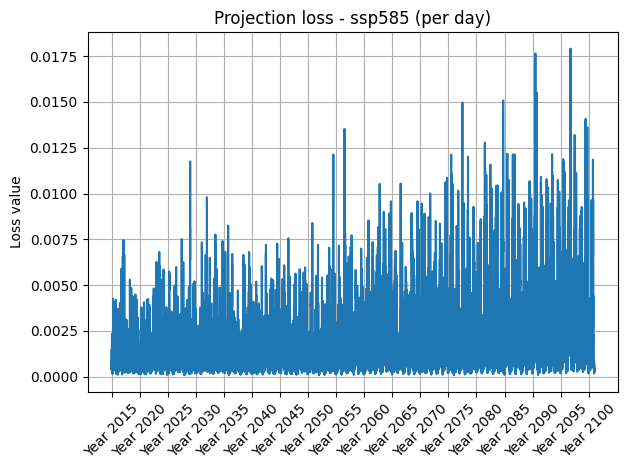

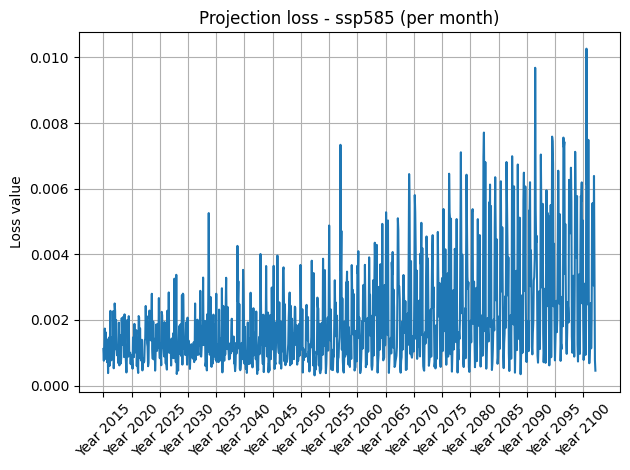

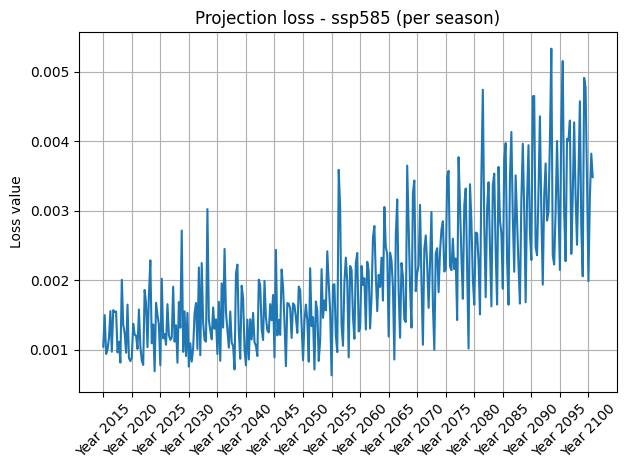

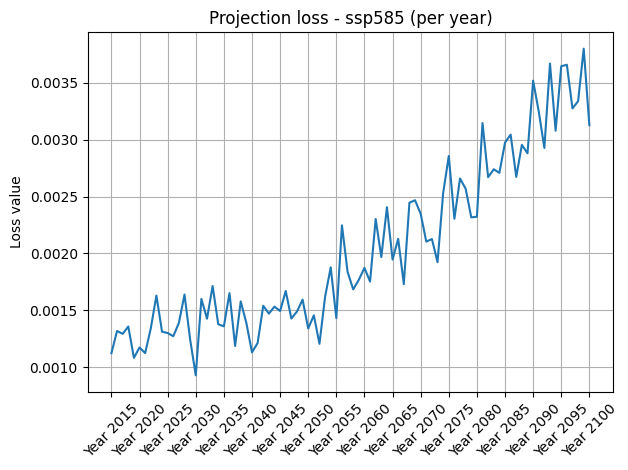

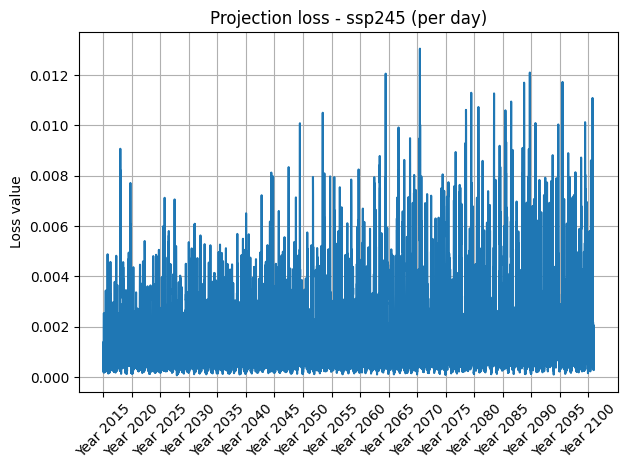

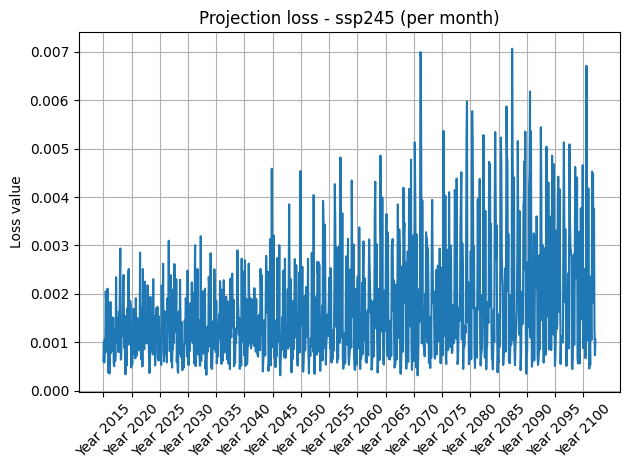

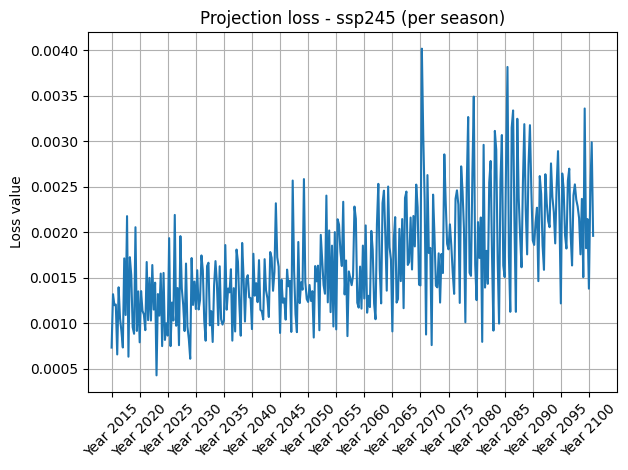

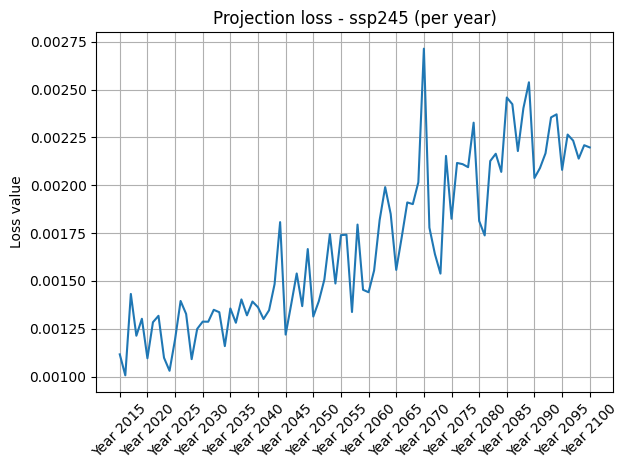

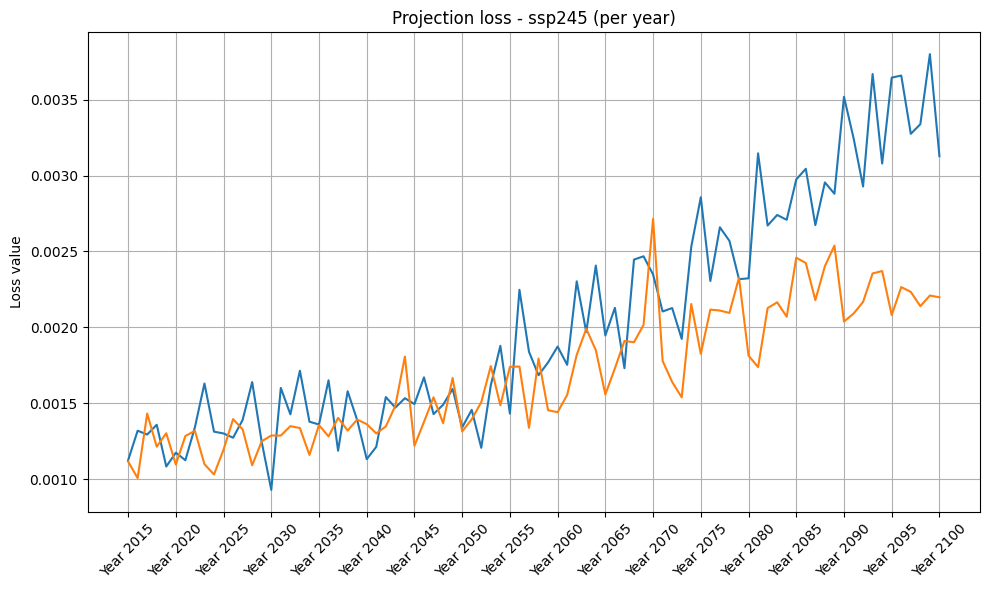

In [11]:
globals()["loss_per_day"] = []
globals()["loss_per_month"] = []
globals()["loss_per_season"] = []
globals()["loss_per_year"] = []

for scenario in scenarios:
    globals()[f"loss_{scenario}_day"] = display_loss(scenario, aggregation="day")
    plt.show()
    globals()[f"loss_{scenario}_month"] = display_loss(scenario, aggregation="month")
    plt.show()
    globals()[f"loss_{scenario}_season"] = display_loss(scenario, aggregation="season")
    plt.show()
    globals()[f"loss_{scenario}_year"] = display_loss(scenario, aggregation="year")
    plt.show()

    globals()["loss_per_day"].append(globals()[f"loss_{scenario}_day"])
    globals()["loss_per_month"].append(globals()[f"loss_{scenario}_month"])
    globals()["loss_per_season"].append(globals()[f"loss_{scenario}_season"])
    globals()["loss_per_year"].append(globals()[f"loss_{scenario}_year"])

plt.figure(figsize=(10, 6))
for scenario in scenarios:
    globals()[f"loss_{scenario}_year"] = display_loss(scenario, aggregation="year")
plt.show()

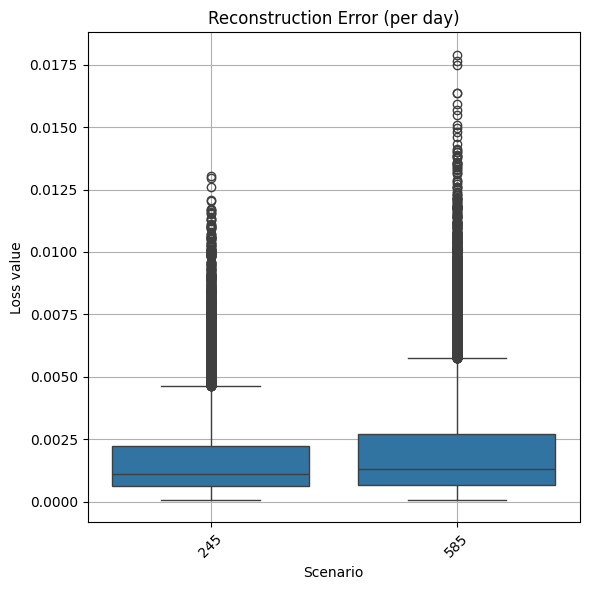

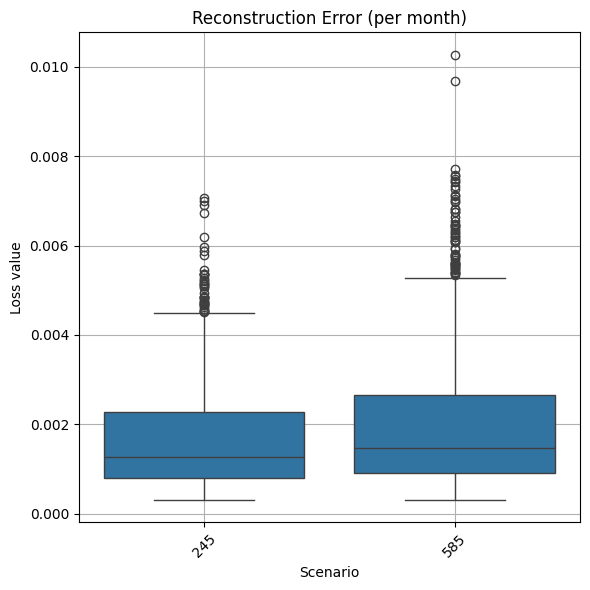

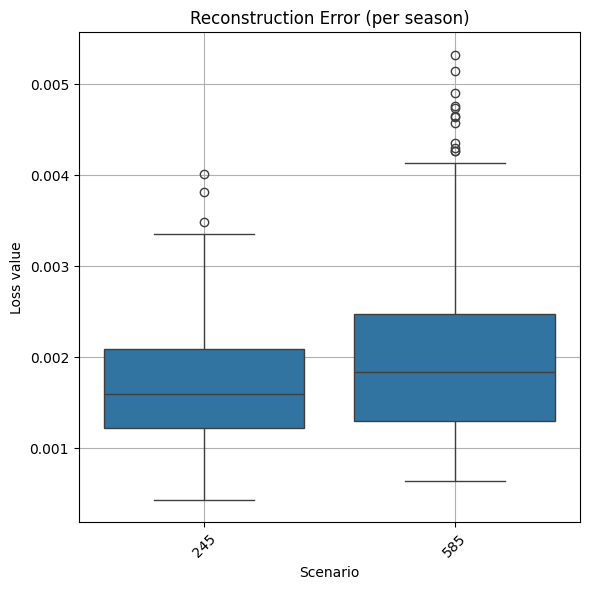

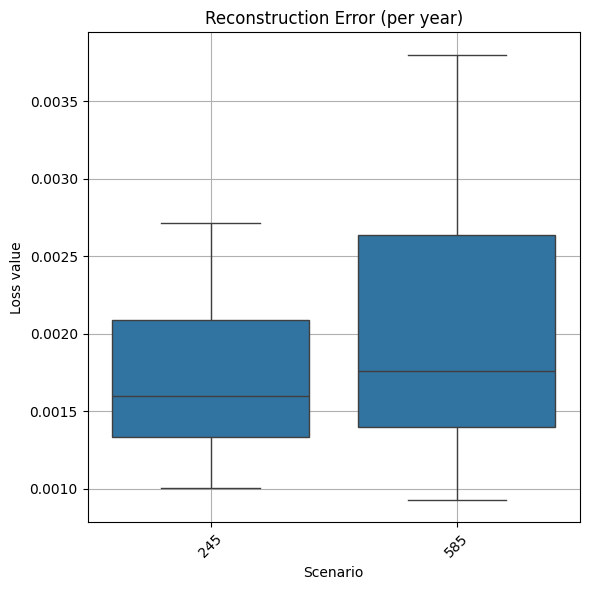

In [12]:
aggregation_type = ["day", "month", "season", "year"]

for agg in aggregation_type:
    data = globals()[f"loss_per_{agg}"]  # liste de listes
    data_long = []

    for i, scenario in enumerate(scenarios):
        scenario_losses = data[i]
        for value in scenario_losses:
            data_long.append({"Scenario": scenario, "Loss value": value})

    df_long = pd.DataFrame(data_long)

    plt.figure(figsize=(6, 6))
    sns.boxplot(x="Scenario", y="Loss value", data=df_long)
    plt.xticks(rotation=45)
    plt.title(f"Reconstruction Error (per {agg})")
    plt.xlabel("Scenario")
    plt.ylabel("Loss value")
    plt.grid(True)
    plt.tight_layout()
    plt.show()